# Introdução ao Pandas

### Utilizando o arquivo Ratings

In [1]:
import pandas as pd

notas = pd.read_csv("ml-latest-small/ratings.csv")
notas.head()

# O head mostra as primeiras N ocorrências do dataframe, 
# por padrão n = 5.

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [2]:
notas.shape

# O shape mostra a quantidade de linhas e colunas do dataframe.

(100836, 4)

In [3]:
notas.columns = ["usuarioID", "filmeID", "nota", "momento"]
notas.head()

# O columns nos permite alterar o nome das colunas.

,usuarioID,filmeID,nota,momento
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [4]:
notas['nota'].unique()

# Dessa forma, conseguimos printar apenas a coluna nota, como
# se fosse um dicionário.
# O unique apresenta apenas as ocorrências únicas de nota.

array([4. , 5. , 3. , 2. , 1. , 4.5, 3.5, 2.5, 0.5, 1.5])

In [5]:
notas['nota'].value_counts()

# O counts conta a quantidade de ocorrências de cada nota.

nota
4.0    26818
3.0    20047
5.0    13211
3.5    13136
4.5     8551
2.0     7551
2.5     5550
1.0     2811
1.5     1791
0.5     1370
Name: count, dtype: int64

In [6]:
notas['nota'].mean()

# O mean representa a média das notas.

3.501556983616962

In [7]:
notas.nota.head()

# A definição .nota é o mesmo de ['nota']

0    4.0
1    4.0
2    4.0
3    5.0
4    5.0
Name: nota, dtype: float64

<Axes: ylabel='Frequency'>

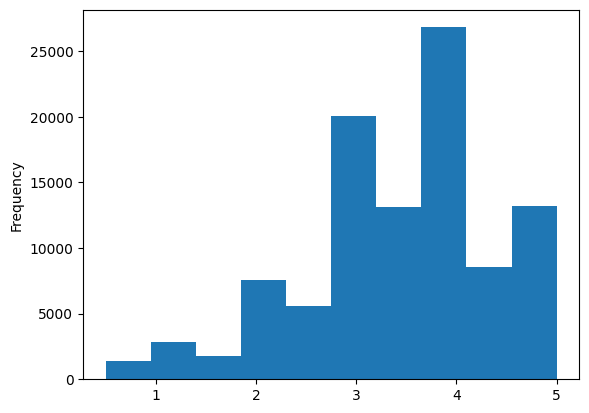

In [8]:
notas.nota.plot(kind='hist')

# O plot do tipo histograma ('hist') irá mostrar 
# a frequência de cada nota

In [9]:
print(f'Média: {notas.nota.mean()}')
print(f'Mediana: {notas.nota.median()}')

# A média é a soma dos valores dividida pela quantidade
# A mediana é o número que fica no meio da amostra
# Exemplo: {2, 2, 3, 7, 8, 9, 9} -> mediana = 7

Média: 3.501556983616962
Mediana: 3.5


In [10]:
notas.nota.describe()

# O describe apresenta alguns dados que permitem analisar o dataframe

count    100836.000000
mean          3.501557
std           1.042529
min           0.500000
25%           3.000000
50%           3.500000
75%           4.000000
max           5.000000
Name: nota, dtype: float64

<Axes: xlabel='nota'>

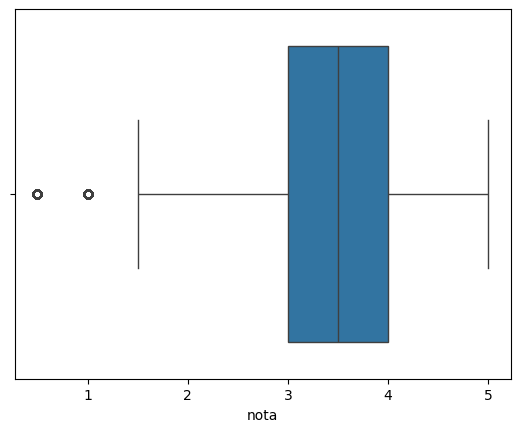

In [11]:
import seaborn as sns

sns.boxplot(x = notas.nota)

### Utilizando o arquivo Filmes


In [12]:
filmes = pd.read_csv("ml-latest-small/movies.csv")
filmes.columns = ["filmeID", "Titulo", "Generos"]
filmes.head()

,filmeID,Titulo,Generos
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


### Querys

In [13]:
notas.query("filmeID == 1").nota

# A função query nos permite fazer uma pesquisa no dataframe
# semelhante à um Banco de Dados mesmo
# Nessa pesquisa apareceram apenas as notas do filme com ID = 1
# nesse caso, é o filme Toy Story

0        4.0
516      4.0
874      4.5
1434     2.5
1667     4.5
        ... 
97364    2.5
98479    4.0
98666    2.5
99497    3.0
99534    5.0
Name: nota, Length: 215, dtype: float64

In [14]:
notas.query("filmeID == 1").nota.mean()

# Essa é a nota média das avaliações do filme com ID == 1,
# que é Toy Story

3.9209302325581397

In [15]:
notas.query("filmeID == 2").nota.mean()

# Essa é a nota média das avaliações do filme com ID == 2,
# que é Jumanji

3.4318181818181817

In [16]:
media_por_filme = notas.groupby("filmeID").mean()["nota"]

# Aqui é bem semelhante à uma pesquisa SQL
# No caso, estamos agrupando as notas pela coluna filmeID
# e printando a média de avaliações de cada filme

<Axes: ylabel='Frequency'>

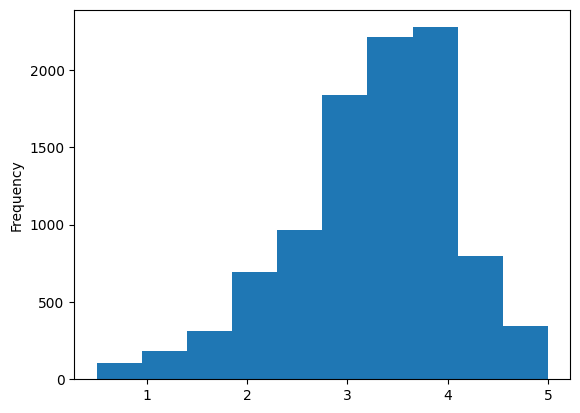

In [17]:
media_por_filme.plot(kind="hist")

# Aqui temos o histograma de médias por filmes, mostrando a
# frequência de ocorrências de cada média

<Axes: xlabel='nota'>

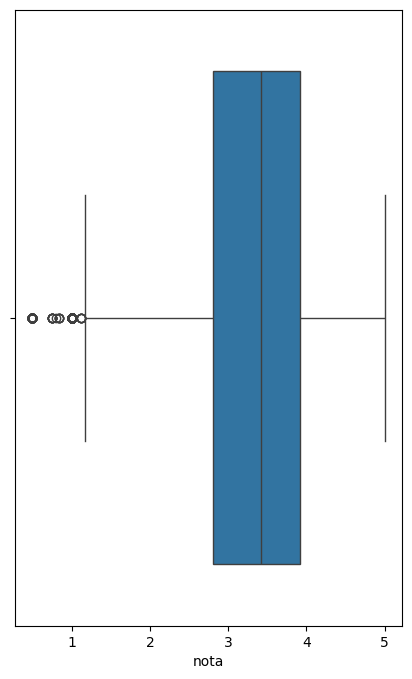

In [18]:
import matplotlib.pyplot as plt

plt.figure(figsize=(5,8))
# Usando uma proporçãode 5 (comprimento) por 8 (largura).
sns.boxplot(x = media_por_filme)

# Aqui o gráfico da mesma forma, mas usando o Seaborn

In [19]:
media_por_filme.describe()

# Aqui usando o describe para ver mais detalhes sobre essas médias

count    9724.000000
mean        3.262448
std         0.869874
min         0.500000
25%         2.800000
50%         3.416667
75%         3.911765
max         5.000000
Name: nota, dtype: float64

<Axes: xlabel='nota', ylabel='Count'>

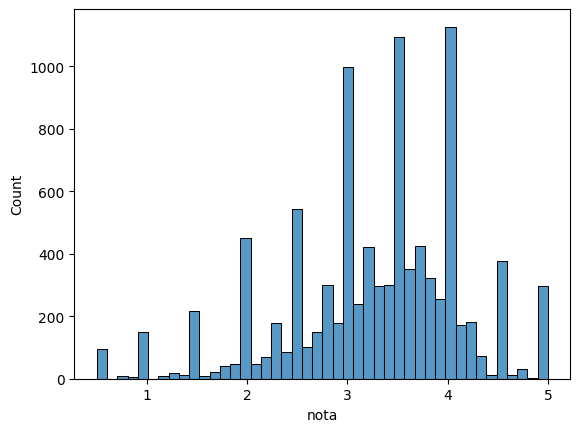

In [20]:
sns.histplot(media_por_filme)

# O seaborn também possui a sua forma de histograma

Text(0.5, 1.0, 'Histograma da Média dos Filmes')

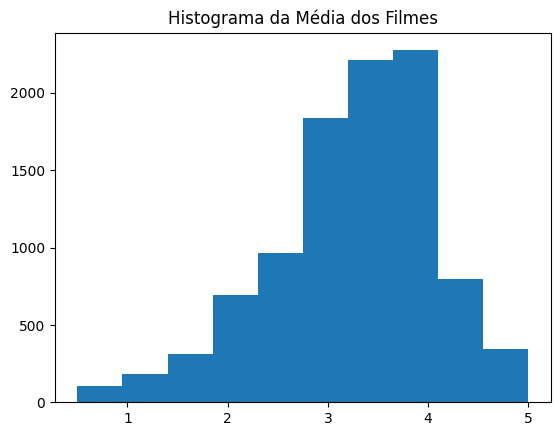

In [21]:
import matplotlib.pyplot as plt

plt.hist(media_por_filme)
plt.title("Histograma da Média dos Filmes")
# Título

# Aqui usando o pyplot através do matplotlib
# Uma forma mais "crua" do que o Seaborn, por exemplo

### Utilizando o TMDB 5000


In [23]:
tmdb_movies = pd.read_csv("tmdb-5000/tmdb_5000_movies.csv")

In [27]:
tmdb_movies['original_language'].unique()

array(['en', 'ja', 'fr', 'zh', 'es', 'de', 'hi', 'ru', 'ko', 'te', 'cn',
       'it', 'nl', 'ta', 'sv', 'th', 'da', 'xx', 'hu', 'cs', 'pt', 'is',
       'tr', 'nb', 'af', 'pl', 'he', 'ar', 'vi', 'ky', 'id', 'ro', 'fa',
       'no', 'sl', 'ps', 'el'], dtype=object)

In [29]:
tmdb_movies["original_language"].value_counts()

# Assim conseguimos ver a quantidade de filmes para cada lingua
# numa visualização em série.

original_language
en    4505
fr      70
es      32
zh      27
de      27
hi      19
ja      16
it      14
cn      12
ru      11
ko      11
pt       9
da       7
sv       5
nl       4
fa       4
th       3
he       3
ta       2
cs       2
ro       2
id       2
ar       2
vi       1
sl       1
ps       1
no       1
ky       1
hu       1
pl       1
af       1
nb       1
tr       1
is       1
xx       1
te       1
el       1
Name: count, dtype: int64

In [31]:
tmdb_movies["original_language"].value_counts().to_frame()

# transformando em um DataFrame para melhor visualização

,count
original_language,
en,4505
fr,70
es,32
zh,27
de,27
hi,19
ja,16
it,14
cn,12


In [36]:
contagem_de_lingua = tmdb_movies["original_language"].value_counts().to_frame().reset_index()
contagem_de_lingua.columns = ["original_language", "total"]
contagem_de_lingua.head()

# Com o reset_index, resetamos o index e um novo índice é criado.
# Novamente, é possível renomear as colunas com .columns para
# melhor visualização

,original_language,total
0,en,4505
1,fr,70
2,es,32
3,zh,27
4,de,27


<Axes: xlabel='original_language', ylabel='total'>

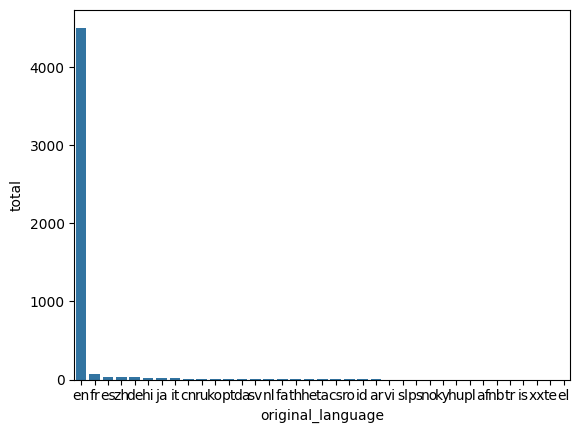

In [37]:
sns.barplot(x = "original_language", y = "total", data = contagem_de_lingua)

# Aqui fazemos um plot em barras do dataframe contagem_de_linguas
# definindo os dados do eixo X e do eixo Y

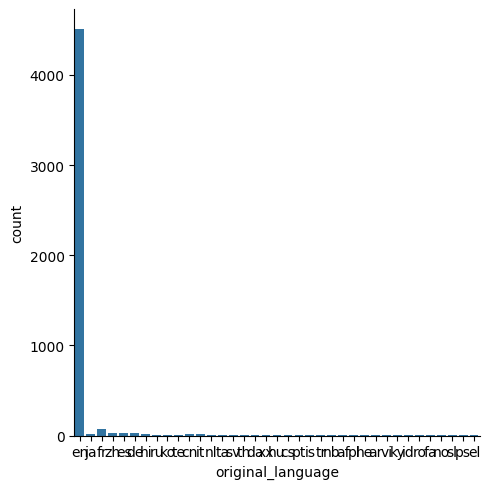

In [38]:
sns.catplot(x = "original_language", kind = "count", data = tmdb_movies)

# Aqui, ao invés de transformar os dados em um dataframe e resetar
# o index e usar o value_counts()
# temos uma abordagem mais direta, utilizando o categorical plot
# do Seaborn.

([<matplotlib.patches.Wedge at 0x16c2abaa900>,
 [Text(-1.0791697536499925, 0.2130554923183512, 'en'),
  Text(1.0355355017029462, -0.3710339940124459, 'fr'),
  Text(1.0579676486019882, -0.3011718023181785, 'es'),
  Text(1.0687996606645356, -0.26012936274741094, 'zh'),
  Text(1.0773191105706255, -0.22222406260195313, 'de'),
  Text(1.0835167978583342, -0.18971386021801853, 'hi'),
  Text(1.0875756432724297, -0.16486121484618815, 'ja'),
  Text(1.0906010773146022, -0.14348968659882622, 'it'),
  Text(1.092883487371409, -0.12492270822755745, 'cn'),
  Text(1.0946390911069936, -0.10846778425161549, 'ru'),
  Text(1.0960865535188649, -0.09270527058984593, 'ko'),
  Text(1.0972054830031333, -0.07835896928789601, 'pt'),
  Text(1.097965443340663, -0.06687215586282344, 'da'),
  Text(1.0984565010300316, -0.05825217030171998, 'sv'),
  Text(1.0987803851616647, -0.0517847968421653, 'nl'),
  Text(1.0990363161210686, -0.04603450713357274, 'fa'),
  Text(1.0992355702663055, -0.04100196411527794, 'th'),
  Text(

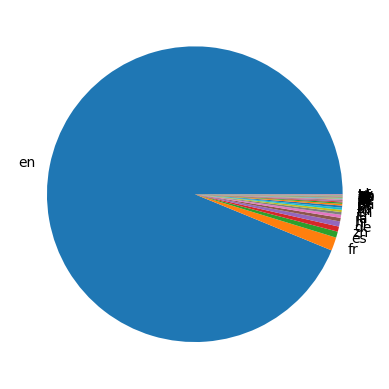

In [40]:
plt.pie(contagem_de_lingua["total"], labels = contagem_de_lingua["original_language"])

# O gráfico de "pizza" não é recomendado para quase nenhuma
# situação, o melhor é evitá-lo.

In [47]:
total_por_lingua = tmdb_movies["original_language"].value_counts()
total_geral = total_por_lingua.sum()
total_ingles = total_por_lingua.loc["en"]
total_resto = total_geral - total_ingles
print(f'Inglês: {total_ingles}, Outros: {total_resto}')

# A função "loc" consegue localizar dados específicos dentro do
# dataframe.

Inglês: 4505, Outros: 298


<Axes: xlabel='Lingua', ylabel='Total'>

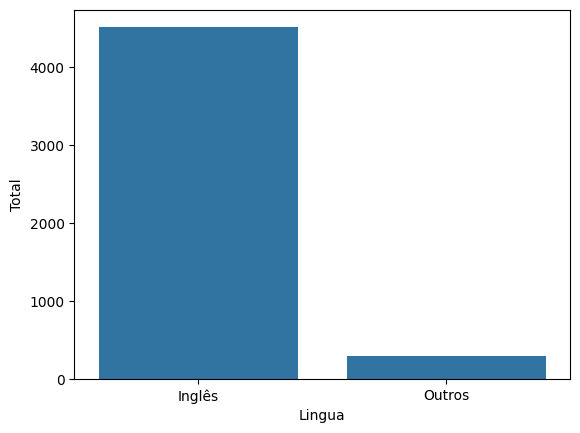

In [49]:
dados = {
    'Lingua' : ["Inglês", "Outros"],
    'Total' : [total_ingles, total_resto]
}

dados = pd.DataFrame(dados)
dados

# O dataframe foi criado com os dados obtidos na célular anterior.

sns.barplot(x = "Lingua", y = "Total", data = dados)

# Se o nosso propósito é mostrar a grande diferença do inglês
# para os outros, esse gráfico é de uma visualização muito melhor.

In [60]:
total_por_lingua_diferente_ingles = tmdb_movies.query("original_language != 'en'").original_language.value_counts()
total_por_lingua_diferente_ingles

# Com essa query, conseguimos pesquisar a quantidade de filmes
# que não tem o inglês como sua língua original

original_language
fr    70
es    32
zh    27
de    27
hi    19
ja    16
it    14
cn    12
ko    11
ru    11
pt     9
da     7
sv     5
fa     4
nl     4
he     3
th     3
ro     2
id     2
ar     2
cs     2
ta     2
tr     1
nb     1
af     1
pl     1
is     1
hu     1
vi     1
ky     1
xx     1
te     1
no     1
sl     1
ps     1
el     1
Name: count, dtype: int64

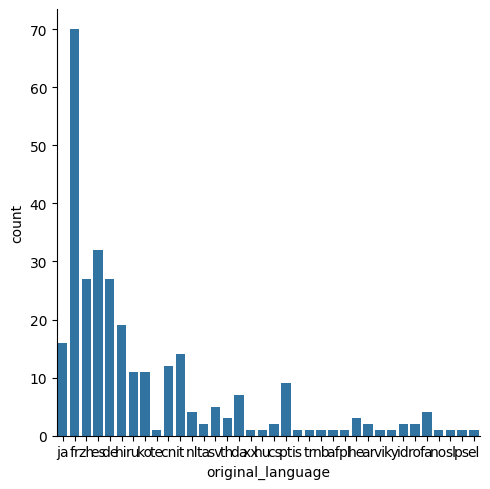

In [63]:
filmes_lingua_diferente_ingles = tmdb_movies.query("original_language != 'en'")
sns.catplot(x = "original_language", kind = "count", data = filmes_lingua_diferente_ingles)

# Aqui plotamos as línguas diferentes do inglês diretamente
# utilizando o catplot do Seaborn.